# Proyek Analisis Data: Air Quality Dataset
- **Nama:** **Shinta Riandini**
- **Email:** **shintariandini3009@gmail.com**
- **ID Dicoding:** **shinta_riandini**

## Menentukan Pertanyaan Bisnis

1. Bagaimana hubungan antara berbagai indikator parameter polutan (PM2.5, PM10, CO, NO2, SO2, O3)?
2. Bagaimana kualitas udara di kedua stasiun dari tahun ke tahun?
3. Stasiun mana yang memiliki kualitas udara terbaik?

## Import Semua Packages/Library yang Digunakan

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [182]:
# URL file CSV dari Google Drive
url1 = "https://drive.google.com/uc?id=1U6dwWYicXyRvWmX6i4ztFMQ7mLfmIHCA"

# Membaca CSV langsung dari URL
dongsi_df = pd.read_csv(url1)
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [183]:
# Membuat format tanggal (datetime) untuk dataset dongsi
years = dongsi_df['year'].values
months = dongsi_df['month'].values
days = dongsi_df['day'].values
hours = dongsi_df['hour'].values
full_date = []

for i in range(dongsi_df.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
dongsi_df = pd.concat([dates,dongsi_df],axis=1)

dongsi_df.head()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [184]:
url2 = "https://drive.google.com/uc?id=19hiCcvbqnaoq_AhhMDi-Hi7EuQHfHQBt"
tiantan_df = pd.read_csv(url2)
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [185]:
# Membuat format tanggal (datetime) untuk dataset Tiantan
years = tiantan_df['year'].values
months = tiantan_df['month'].values
days = tiantan_df['day'].values
hours = tiantan_df['hour'].values
full_date = []

for i in range(tiantan_df.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
tiantan_df = pd.concat([dates,tiantan_df],axis=1)

tiantan_df.head()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013-03-01 01:00:00,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013-03-01 02:00:00,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Mengumpulkan dataset pertama yaitu PRSA_Data_Dongsi_20130301-20170228 dengan membaca file csv dari drive yang disimpan ke Dataframe *dongsi_df*
- Mengumpulkan dataset kedua yaitu PRSA_Data_Tiantan_20130301-20170228 dengan membaca file csv dari drive yang disimpan ke Dataframe *tiantan_df*

### Assessing Data

**Menilai Tabel Dongsi**

In [186]:
# Menampilkan info dataframe dongsi_df
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   No       35064 non-null  int64         
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    34314 non-null  float64       
 7   PM10     34511 non-null  float64       
 8   SO2      34401 non-null  float64       
 9   NO2      33463 non-null  float64       
 10  CO       31867 non-null  float64       
 11  O3       34400 non-null  float64       
 12  TEMP     35044 non-null  float64       
 13  PRES     35044 non-null  float64       
 14  DEWP     35044 non-null  float64       
 15  RAIN     35044 non-null  float64       
 16  wd       34986 non-null  object        
 17  WSPM     35050 non-null  float6

In [187]:
# Mencari Data Null dalam dataset
dongsi_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601


In [188]:
# Mencari Jumlah Nilai Duplikasi
print("Jumlah duplikasi: ", dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


In [189]:
dongsi_df.describe(include="all")

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN


**Menilai Tabel Tiantan**

In [190]:
# Menampilkan info dataframe Tiantan
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   No       35064 non-null  int64         
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    34387 non-null  float64       
 7   PM10     34467 non-null  float64       
 8   SO2      33946 non-null  float64       
 9   NO2      34320 non-null  float64       
 10  CO       33938 non-null  float64       
 11  O3       34221 non-null  float64       
 12  TEMP     35044 non-null  float64       
 13  PRES     35044 non-null  float64       
 14  DEWP     35044 non-null  float64       
 15  RAIN     35044 non-null  float64       
 16  wd       34986 non-null  object        
 17  WSPM     35050 non-null  float6

In [191]:
# Mencari Data Null dalam dataset
tiantan_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744


In [192]:
# Mencari Jumlah Nilai Duplikasi
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


In [193]:
tiantan_df.describe(include="all")

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN


**Insight:**
- Dataset memiliki struktur kolom yang mirip dimana terdapat 18 Kolom pada setiap Dataset
- Tidak terdapat data dupilikat pada kedua dataset tersebut, namun terdapat banyak missing vallue di dataset tersebut

### Cleaning Data

Karena data duplikat Tidak ada pada dataset tersebut, maka Clening data lanjut ke Missing Value

**Tabel Dongsi**

In [194]:
# Cek Missing Value di Tabel Dongsi
dongsi_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601


In [195]:
# Mengisi Nilai Null dengan Nilai Rata-rata
dongsi_df['PM2.5'].fillna(value=86.19, inplace=True)
dongsi_df['PM10'].fillna(value=110.34, inplace=True)
dongsi_df['SO2'].fillna(value=18.53, inplace=True)
dongsi_df['NO2'].fillna(value=53.69, inplace=True)
dongsi_df['CO'].fillna(value=1330.07, inplace=True)
dongsi_df['O3'].fillna(value=57.21, inplace=True)
dongsi_df['TEMP'].fillna(value=13.67, inplace=True)
dongsi_df['PRES'].fillna(value=1012.55, inplace=True)
dongsi_df['DEWP'].fillna(value=2.45, inplace=True)
dongsi_df['RAIN'].fillna(value=0.06, inplace=True)
dongsi_df['WSPM'].fillna(value=1.86, inplace=True)

# Menggunakan top data untuk Nilai Null
dongsi_df['wd'].fillna(value="ENE", inplace=True)

<ipython-input-195-5e2adfa678da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dongsi_df['PM2.5'].fillna(value=86.19, inplace=True)
<ipython-input-195-5e2adfa678da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [196]:
# Cek Missing Value di Tabel Dongsi
dongsi_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0


**Tabel Tiantan**

In [197]:
# Cek Missing Value di Tabel Tiantan
tiantan_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744


In [198]:
# Mengisi Nilai Null dengan Nilai Rata-rata
tiantan_df['PM2.5'].fillna(value=82.16, inplace=True)
tiantan_df['PM10'].fillna(value=106.36, inplace=True)
tiantan_df['SO2'].fillna(value=14.37, inplace=True)
tiantan_df['NO2'].fillna(value=53.16, inplace=True)
tiantan_df['CO'].fillna(value=1298.3, inplace=True)
tiantan_df['O3'].fillna(value=55.98, inplace=True)
tiantan_df['TEMP'].fillna(value=13.67, inplace=True)
tiantan_df['PRES'].fillna(value=1012.55, inplace=True)
tiantan_df['DEWP'].fillna(value=2.45, inplace=True)
tiantan_df['RAIN'].fillna(value=0.06, inplace=True)
tiantan_df['WSPM'].fillna(value=1.86, inplace=True)

# Menggunakan top data untuk Nilai Null
tiantan_df['wd'].fillna(value="ENE", inplace=True)

<ipython-input-198-e50cb482a870>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tiantan_df['PM2.5'].fillna(value=82.16, inplace=True)
<ipython-input-198-e50cb482a870>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [199]:
# Cek Missing Value di Tabel Dongsi
tiantan_df.isna().sum()

,0
date,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0


**Insight:**
- Karena Tidak ada data Duplikat, Cleaning data langsung mengisi Missing Value dengan Rata-rata dan Nilai TOP Value
- Data sudah Bersih dan tidak ada Missing Value

## Exploratory Data Analysis (EDA)

### Explore Tabel Dongsi

In [200]:
# Mengambil sampel 5 data Tabel Dongsi
dongsi_df.sample(5)

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
9804,2014-04-13 12:00:00,9805,2014,4,13,12,201.0,214.0,42.0,95.0,1500.0,92.0,21.6,1013.0,4.6,0.0,S,3.3,Dongsi
1854,2013-05-17 06:00:00,1855,2013,5,17,6,104.0,132.0,44.0,77.0,1500.0,29.0,17.7,1009.3,10.8,0.0,SE,1.9,Dongsi
22520,2015-09-25 08:00:00,22521,2015,9,25,8,46.0,46.0,2.0,48.0,900.0,19.0,17.4,1007.7,13.7,0.0,NNW,1.1,Dongsi
28414,2016-05-27 22:00:00,28415,2016,5,27,22,36.0,68.0,10.0,33.0,600.0,98.0,23.7,1004.1,7.3,0.0,SW,3.8,Dongsi
26836,2016-03-23 04:00:00,26837,2016,3,23,4,39.0,39.0,8.0,54.0,600.0,27.0,4.9,1026.3,-6.1,0.0,ESE,1.0,Dongsi


In [201]:
# Parameter Statitik
dongsi_df.describe(include='all')

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194205,110.336793,18.531086,53.699012,1330.06921,57.210625,13.671489,1012.547421,2.447536,0.064017,NaN,1.860784,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.00000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,600.00000,13.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,63.000000,88.000000,10.000000,49.000000,1100.00000,46.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,1600.00000,80.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.00000,1071.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN


In [202]:
# Cek apakah data pada tabel dongsi sudah unik
dongsi_df.No.is_unique

True

In [203]:
# Cek duplikat
dongsi_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
35059,False
35060,False
35061,False
35062,False


In [204]:
# Mengelompokkan Data berdasarkan tahun untuk semua indikator parameter berdasarkan nilai(min, max, mean)
dongsi_df.groupby(by="year").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"]
})

No  PM2.5                    PM10                     SO2          \
     nunique    max  min        mean    max  min        mean    max     min   
year                                                                          
2013    7344  520.0  3.0   86.925677  602.0  2.0  105.018181  198.0  0.2856   
2014    8760  737.0  3.0   87.455437  794.0  3.0  116.939148  230.0  2.0000   
2015    8760  685.0  3.0   87.326373  816.0  3.0  111.840267  145.0  2.0000   
2016    8784  695.0  3.0   80.465627  891.0  5.0  103.282445  278.0  2.0000   
2017    1416  681.0  3.0  103.130438  955.0  5.0  131.536102  300.0  1.0000   

                   NO2                       CO                          O3  \
           mean    max  min       mean      max    min         mean     max   
year                                                                          
2013  23.917802  258.0  2.0  57.598677   9400.0  100.0  1335.309054  1071.0   
2014  23.790476  236.0  2.0  55.581038   7700.0  100.0  1367.693745   320.0   
2015  15.218655  256.0  4.0  50.372651  10000.0  100.0  1335.668408   308.0   
2016  11.783711  210.0  2.0  51.196463   9900.0  100.0  1243.028490   342.0   
2017  20.405042  192.0  2.0  57.933206   9500.0  100.0  1575.439534   500.0   

                         
         min       mean  
year                     
2013  0.6426  63.489902  
2014  1.0000  57.245944  
2015  2.0000  55.796030  
2016  2.0000  56.145970  
2017  1.0000  39.780805

In [205]:
# Mengelompokkan Data berdasarkan bulan untuk semua indikator parameter berdasarkan nilai(min, max, mean)
dongsi_df.groupby(by="month").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"]
})

No  PM2.5                    PM10                        SO2  \
      nunique    max  min        mean    max  min        mean       max   
month                                                                     
1        2976  681.0  3.0  100.380558  955.0  5.0  118.464160  300.0000   
2        2712  737.0  3.0   93.753396  876.0  5.0  109.364897  278.0000   
3        2976  520.0  3.0  100.345669  891.0  3.0  142.942325  198.0000   
4        2880  460.0  3.0   77.219917  663.0  3.0  121.432153  111.0000   
5        2976  408.0  3.0   70.391341  848.0  5.0  108.426290  157.0000   
6        2880  515.0  3.0   73.833132  551.0  2.0   88.048986   89.0000   
7        2976  287.0  3.0   80.501767  354.0  2.0   86.950773  109.0992   
8        2976  235.0  3.0   59.173965  349.0  2.0   74.296364   55.0000   
9        2880  323.0  3.0   67.517451  316.0  2.0   84.956882  104.0000   
10       2976  450.0  3.0   98.409724  508.0  3.0  122.895941  178.0000   
11       2880  685.0  3.0   99.816219  794.0  5.0  126.821167  196.0000   
12       2976  680.0  3.0  112.806599  737.0  2.0  138.707366  164.0000   

                               NO2                       CO         \
          min       mean       max  min       mean      max    min   
month                                                                
1      1.0000  33.324325  192.0000  2.0  59.608051   9500.0  100.0   
2      2.0000  30.634558  164.0000  2.0  47.510863   6600.0  100.0   
3      2.0000  30.474433  258.0000  6.0  61.681560   6800.0  100.0   
4      2.0000  16.598579  182.0000  2.0  47.304226   3800.0  100.0   
5      2.0000  17.588609  183.0000  2.0  45.381606   4700.0  100.0   
6      0.2856  11.079067  160.0000  6.0  45.817358  10000.0  100.0   
7      0.2856   7.922924  139.1934  4.0  41.803653   3600.0  200.0   
8      0.2856   6.207647  140.0000  2.0  41.458108   6700.0  200.0   
9      1.0000   8.321618  166.0000  3.0  53.840282   4600.0  100.0   
10     1.0000  12.318274  256.0000  3.0  68.320105   6400.0  100.0   
11     2.0000  19.333424  198.0000  2.0  64.170948   9600.0  100.0   
12     2.0000  29.037084  210.0000  2.0  66.824263  10000.0  100.0   

                        O3                     
              mean     max     min       mean  
month                                          
1      1809.725121   500.0  1.0000  27.943380  
2      1417.310273   111.0  2.0000  42.173562  
3      1409.962315   188.0  0.6426  51.787195  
4       923.448753   257.0  2.0000  71.917102  
5       939.888619   306.0  2.0000  91.801676  
6      1114.245684   335.0  2.0000  93.295574  
7      1106.041358   306.0  1.0710  89.711927  
8      1001.990054  1071.0  1.0000  91.729098  
9      1095.056160   237.0  1.0000  55.921874  
10     1280.824687   247.0  1.0000  29.703679  
11     1731.107965   111.0  2.0000  18.983992  
12     2124.245491    76.0  2.0000  20.588248

In [206]:
# Mengelompokkan Data berdasarkan hari untuk semua indikator parameter berdasarkan nilai(min, max, mean)
dongsi_df.groupby(by="day").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"]
})

No  PM2.5                    PM10                     SO2          \
    nunique    max  min        mean    max  min        mean    max     min   
day                                                                          
1      1152  680.0  3.0   94.796328  710.0  2.0  116.194132   94.0  0.5712   
2      1152  505.0  3.0   79.961319  587.0  2.0   97.134757  116.0  0.2856   
3      1152  599.0  3.0   91.840634  759.0  2.0  118.449688  178.0  1.4280   
4      1152  663.0  3.0   97.274045  857.0  2.0  121.711389  134.0  0.2856   
5      1152  416.0  3.0   81.097318  888.0  2.0  106.926771  124.0  1.0000   
6      1152  408.0  3.0   93.407882  848.0  3.0  112.801667  300.0  2.0000   
7      1152  520.0  3.0   93.853620  585.0  5.0  111.334045  134.0  0.2856   
8      1152  695.0  3.0   87.982387  876.0  3.0  108.780122  278.0  1.4280   
9      1152  371.0  3.0   76.848003  602.0  3.0  101.409497  121.0  1.9992   
10     1152  339.0  3.0   69.495946  602.0  2.0   95.593785  145.0  1.0000   
11     1152  377.0  3.0   71.088151  558.0  3.0   86.328872  198.0  0.2856   
12     1152  392.0  3.0   68.610260  417.0  3.0   84.389375  118.0  0.2856   
13     1152  359.0  3.0   76.426285  457.0  3.0   96.669010  134.0  0.2856   
14     1152  737.0  3.0   84.541580  760.0  3.0  107.748906  230.0  0.2856   
15     1152  679.0  3.0   98.860938  726.0  4.0  132.055365  173.0  1.0000   
16     1152  603.0  3.0  102.235729  623.0  5.0  129.519444  166.0  0.5712   
17     1152  509.0  3.0   93.512352  566.0  5.0  117.480330  131.0  1.0000   
18     1152  487.0  3.0   83.428828  452.0  3.0  108.485747  103.0  1.0000   
19     1152  494.0  3.0   87.092187  645.0  2.0  116.880833  121.0  1.0000   
20     1152  490.0  3.0   84.469071  672.0  3.0  107.764531  164.0  1.0000   
21     1152  488.0  3.0   90.186597  659.0  3.0  115.367552  108.0  1.0000   
22     1152  507.0  3.0   83.376155  669.0  3.0  110.967500  192.0  1.0000   
23     1152  396.0  3.0   84.549635  400.0  3.0  105.139583  196.0  1.0000   
24     1152  482.0  3.0   84.751927  503.0  3.0  111.079184  180.0  0.5712   
25     1152  660.0  3.0   97.975929  660.0  5.0  122.514063  164.0  0.2856   
26     1152  516.0  3.0   89.121892  563.0  3.0  115.680069  160.0  2.0000   
27     1152  420.0  3.0   71.980590  493.0  3.0   97.556476  124.0  2.0000   
28     1152  681.0  3.0   88.875651  955.0  2.0  114.758003  172.0  2.0000   
29     1080  555.0  3.0   86.459204  816.0  3.0  119.178185  148.0  1.0000   
30     1056  685.0  3.0   88.425227  794.0  5.0  117.585625  122.0  1.0000   
31      672  513.0  3.0   92.199271  634.0  9.0  116.809851  131.0  0.2856   

                     NO2                          CO                      \
          mean       max     min       mean      max    min         mean   
day                                                                        
1    16.233087  186.0000  2.0000  53.290716  10000.0  100.0  1450.549540   
2    18.303180  170.0000  6.0000  53.929569   9200.0  100.0  1367.412786   
3    19.473175  210.0000  4.0000  56.035410   9500.0  100.0  1517.433681   
4    18.306873  208.0000  2.0000  57.066880  10000.0  200.0  1461.246389   
5    16.905016  205.0000  6.0000  52.221898  10000.0  100.0  1250.113941   
6    21.073570  192.0000  2.0000  54.912277  10000.0  100.0  1361.416788   
7    19.982773  258.0000  5.0000  54.062698   7000.0  100.0  1374.939800   
8    19.607589  241.0000  4.0000  52.132001   6400.0  100.0  1282.240408   
9    15.971098  209.0000  6.0000  51.999931   7200.0  100.0  1251.691797   
10   16.081539  158.2863  2.0000  49.682763   6800.0  100.0  1208.727127   
11   18.049586  165.0000  5.5431  49.716410   5700.0  100.0  1223.473576   
12   15.652535  154.0000  2.0000  49.612087   6700.0  100.0  1139.125286   
13   19.382097  159.0000  6.0000  53.474333   6600.0  100.0  1254.242977   
14   19.382109  174.0000  2.0000  54.920992   5200.0  100.0  1292.612161   
15   24.475705  166.0000  7.0000  60.943345   6600.0  100.0  149

In [207]:
# Mengelompokkan Data berdasarkan jam untuk semua indikator parameter berdasarkan nilai(min, max, mean)
dongsi_df.groupby(by="hour").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"]
})

No  PM2.5                   PM10                     SO2          \
     nunique    max  min       mean    max  min        mean    max     min   
hour                                                                         
0       1461  679.0  3.0  96.944346  819.0  3.0  124.497221  196.0  0.2856   
1       1461  662.0  3.0  96.449535  955.0  3.0  121.676564  278.0  0.2856   
2       1461  654.0  3.0  94.900452  907.0  3.0  118.950281  187.0  0.2856   
3       1461  695.0  3.0  92.505565  876.0  3.0  114.242478  201.0  0.8568   
4       1461  681.0  3.0  89.114394  915.0  2.0  108.771253  185.0  1.0000   
5       1461  647.0  3.0  85.188125  796.0  2.0  103.779466  174.0  0.8568   
6       1461  606.0  3.0  82.360281  825.0  3.0  102.352580  176.0  0.8568   
7       1461  583.0  3.0  80.403114  708.0  3.0  101.576701  167.0  0.2856   
8       1461  606.0  3.0  80.005934  606.0  3.0  102.737413  178.0  1.0000   
9       1461  640.0  3.0  79.685366  663.0  3.0  102.504312  176.0  0.8568   
10      1461  624.0  3.0  79.814216  816.0  2.0  101.989363  177.0  0.8568   
11      1461  628.0  3.0  80.657522  706.0  2.0  101.110541  181.0  0.5712   
12      1461  637.0  3.0  80.519829  680.0  3.0   98.555537  198.0  0.2856   
13      1461  680.0  3.0  80.729624  695.0  3.0   97.746667  179.0  0.2856   
14      1461  678.0  3.0  79.406201  702.0  3.0   96.900164  177.0  0.8568   
15      1461  671.0  3.0  78.415291  762.0  2.0   98.371348  179.0  0.2856   
16      1461  632.0  3.0  78.364695  703.0  2.0  100.875866  196.0  0.2856   
17      1461  638.0  3.0  78.954141  671.0  3.0  103.926174  171.0  1.0000   
18      1461  666.0  3.0  81.675455  675.0  3.0  112.272074  150.0  1.0000   
19      1461  670.0  3.0  87.191335  688.0  3.0  120.630048  171.0  0.2856   
20      1461  685.0  3.0  93.342875  690.0  3.0  127.858193  163.0  0.8568   
21      1461  685.0  3.0  97.281499  891.0  3.0  130.643641  300.0  0.5712   
22      1461  684.0  3.0  97.444695  760.0  3.0  129.114415  230.0  0.2856   
23      1461  737.0  3.0  97.306427  759.0  3.0  127.000739  200.0  0.2856   

                      NO2                       CO                      \
           mean       max  min       mean      max    min         mean   
hour                                                                     
0     19.009072  241.0000  2.0  63.261997   9400.0  100.0  1478.929281   
1     19.380747  232.0000  2.0  62.266241  10000.0  100.0  1484.686153   
2     18.981886  226.0000  2.0  61.331126  10000.0  100.0  1487.251075   
3     18.993792  216.0000  2.0  60.664246  10000.0  100.0  1334.469090   
4     18.441287  189.0000  2.0  59.401940  10000.0  100.0  1272.691376   
5     17.606688  187.0000  2.0  57.298220   9000.0  100.0  1390.668056   
6     17.079622  196.0000  2.0  57.260481  10000.0  100.0  1409.230397   
7     17.376016  190.0000  2.0  58.149190   9400.0  100.0  1427.608460   
8     18.119540  200.0000  2.0  58.561144   9300.0  100.0  1440.085578   
9     19.198757  199.0000  2.0  55.712570   8700.0  100.0  1396.733860   
10    20.235305  191.3396  2.0  52.510815   8300.0  100.0  1344.371574   
11    20.768892  219.0000  2.0  49.012861  10000.0  100.0  1318.121985   
12    20.477213  254.0000  2.0  45.695900   9900.0  100.0  1258.854901   
13    19.917180  202.0000  2.0  41.901508   8600.0  100.0  1193.637782   
14    18.645287  180.0000  2.0  38.915884   9500.0  100.0  1136.018392   
15    18.015787  204.0000  2.0  37.922824  10000.0  100.0  1112.654353   
16    17.542031  205.0000  2.0  38.510136   8600.0  100.0  1093.662327   
17    17.086975  203.0000  2.0  41.280504   8700.0  100.0  1115.961930   
18    16.870336  208.0000  2.0  46.557959   9500.0  100.0  1186.391773   
19    17.330927  215.0000  2.0  53.100627   9100.0  100.0  1278.075996   
20    17.751023  227.0000  2.0  58.832848  10000.0  100.0  1371.330856   
21    18.347960  257.0000  2.0  62.496909  10000.0  100.0  1429.853990   
22    18.637853  258.0000  2.0  64.126515   9500.0  1

**Parameter Pengukuran Kualitas Udara**

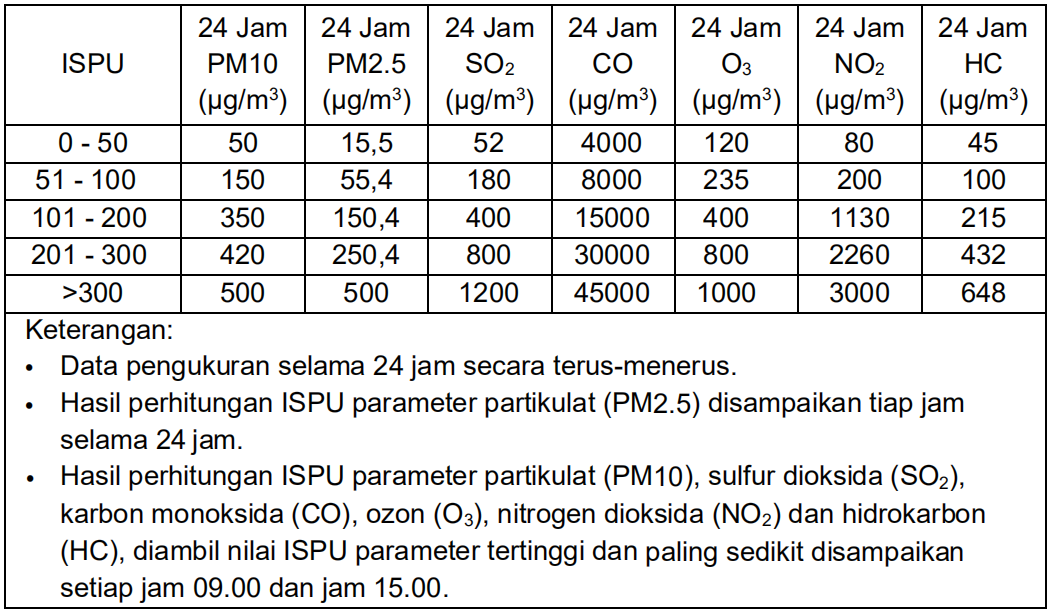

Berikut ini adalah beberapa kategori kualitas udara berdasarkan AQI:
1. Baik -> AQI 0–50, udara bersih dan tidak menimbulkan risiko kesehatan
2. Sedang -> AQI 51–100, udara masih baik, tetapi dapat mengganggu kesehatan orang yang sensitif terhadap polusi
3. Tidak Sehat -> AQI 101–199, udara sudah buruk dan dapat mengganggu kesehatan orang yang sensitif terhadap polusi
4. Sangat Tidak Sehat -> AQI 200–300, udara sangat buruk dan dapat mengganggu kesehatan sebagian besar populasi
5. Berbahaya -> AQI 301–500, udara sangat berbahaya dan dapat mengganggu kesehatan sebagian besar populasi

In [208]:
# Buat fungsi kategori untuk Indikator PM2.5 (Untuk kedua tabel)
def kategori_pm25(value):
    if value <= 15.5:
        return 'Baik'
    elif value <= 55.4:
        return 'Sedang'
    elif value <= 150.4:
        return 'Tidak Sehat'
    elif value <= 250.4:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

In [209]:
#Tampilkan Kategori berdasarkan Indikator PM2.5
dongsi_df['Kategori_PM2.5'] = dongsi_df['PM2.5'].apply(kategori_pm25)
print(dongsi_df[['PM2.5', 'Kategori_PM2.5']])

       PM2.5 Kategori_PM2.5
0        9.0           Baik
1        4.0           Baik
2        7.0           Baik
3        3.0           Baik
4        3.0           Baik
...      ...            ...
35059   16.0         Sedang
35060   18.0         Sedang
35061   23.0         Sedang
35062   23.0         Sedang
35063   30.0         Sedang

[35064 rows x 2 columns]


In [210]:
# Hitung distribusi kategori Indikator PM2.5
distribusipm25 = dongsi_df['Kategori_PM2.5'].value_counts()
print(distribusipm25)

Kategori_PM2.5
Tidak Sehat           12978
Sedang                 9849
Baik                   6297
Sangat Tidak Sehat     4016
Berbahaya              1924
Name: count, dtype: int64


In [211]:
#Buat fungsi kategori untuk Indikator PM10 (Untuk kedua tabel)
def kategori_pm10(value):
    if value <= 50:
        return 'Baik'
    elif value <= 150:
        return 'Sedang'
    elif value <= 350:
        return 'Tidak Sehat'
    elif value <= 420:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

In [212]:
#Tampilkan Kategori berdasarkan Indikator PM10
dongsi_df['Kategori_PM10'] = dongsi_df['PM10'].apply(kategori_pm10)
print(dongsi_df[['PM10', 'Kategori_PM10']])

       PM10 Kategori_PM10
0       9.0          Baik
1       4.0          Baik
2       7.0          Baik
3       3.0          Baik
4       3.0          Baik
...     ...           ...
35059  51.0        Sedang
35060  45.0          Baik
35061  58.0        Sedang
35062  53.0        Sedang
35063  71.0        Sedang

[35064 rows x 2 columns]


In [213]:
# Hitung distribusi kategori Indikator PM10
distribusipm10 = dongsi_df['Kategori_PM10'].value_counts()
print(distribusipm10)

Kategori_PM10
Sedang                15266
Baik                  11127
Tidak Sehat            7690
Berbahaya               503
Sangat Tidak Sehat      478
Name: count, dtype: int64


In [214]:
#Buat fungsi kategori untuk Indikator SO2 (Untuk kedua tabel)
def kategori_so2(value):
    if value <= 52:
        return 'Baik'
    elif value <= 180:
        return 'Sedang'
    elif value <= 400:
        return 'Tidak Sehat'
    elif value <= 800:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

In [215]:
#Tampilkan Kategori berdasarkan Indikator SO2
dongsi_df['Kategori_SO2'] = dongsi_df['SO2'].apply(kategori_so2)
print(dongsi_df[['SO2', 'Kategori_SO2']])

         SO2 Kategori_SO2
0       3.00         Baik
1       3.00         Baik
2      18.53         Baik
3       5.00         Baik
4       7.00         Baik
...      ...          ...
35059   3.00         Baik
35060   3.00         Baik
35061   5.00         Baik
35062   9.00         Baik
35063  11.00         Baik

[35064 rows x 2 columns]


In [216]:
# Hitung distribusi kategori Indikator SO2
distribusiso2 = dongsi_df['Kategori_SO2'].value_counts()
print(distribusiso2)

Kategori_SO2
Baik           32259
Sedang          2790
Tidak Sehat       15
Name: count, dtype: int64


In [217]:
#Buat fungsi kategori untuk Indikator NO2 (Untuk kedua tabel)
def kategori_no2(value):
    if value <= 80:
        return 'Baik'
    elif value <= 200:
        return 'Sedang'
    elif value <= 1130:
        return 'Tidak Sehat'
    elif value <= 2260:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

In [218]:
#Tampilkan Kategori berdasarkan Indikator NO2
dongsi_df['Kategori_NO2'] = dongsi_df['NO2'].apply(kategori_no2)
print(dongsi_df[['NO2', 'Kategori_NO2']])

         NO2 Kategori_NO2
0      17.00         Baik
1      16.00         Baik
2      17.00         Baik
3      18.00         Baik
4      53.69         Baik
...      ...          ...
35059  29.00         Baik
35060  43.00         Baik
35061  61.00         Baik
35062  75.00         Baik
35063  87.00       Sedang

[35064 rows x 2 columns]


In [219]:
# Hitung distribusi kategori
distribusino2 = dongsi_df['Kategori_NO2'].value_counts()
print(distribusino2)

Kategori_NO2
Baik           28393
Sedang          6634
Tidak Sehat       37
Name: count, dtype: int64


In [220]:
#Buat fungsi kategori untuk Indikator CO (Untuk kedua tabel)
def kategori_co(value):
    if value <= 4000:
        return 'Baik'
    elif value <= 8000:
        return 'Sedang'
    elif value <= 15000:
        return 'Tidak Sehat'
    elif value <= 30000:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

In [221]:
#Tampilkan Kategori berdasarkan Indikator CO
dongsi_df['Kategori_CO'] = dongsi_df['CO'].apply(kategori_co)
print(dongsi_df[['CO', 'Kategori_CO']])

            CO Kategori_CO
0       300.00        Baik
1       300.00        Baik
2       300.00        Baik
3      1330.07        Baik
4       200.00        Baik
...        ...         ...
35059   400.00        Baik
35060   500.00        Baik
35061   700.00        Baik
35062   900.00        Baik
35063  1200.00        Baik

[35064 rows x 2 columns]


In [222]:
# Hitung distribusi kategori Indikator CO
distribusico = dongsi_df['Kategori_CO'].value_counts()
print(distribusico)

Kategori_CO
Baik           33867
Sedang          1102
Tidak Sehat       95
Name: count, dtype: int64


In [223]:
#Buat fungsi kategori untuk Indikator O3 (Untuk kedua tabel)
def kategori_o3(value):
    if value <= 120:
        return 'Baik'
    elif value <= 235:
        return 'Sedang'
    elif value <= 400:
        return 'Tidak Sehat'
    elif value <= 800:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

In [224]:
#Tampilkan Kategori berdasarkan Indikator 03
dongsi_df['Kategori_O3'] = dongsi_df['O3'].apply(kategori_o3)
print(dongsi_df[['O3', 'Kategori_O3']])

          O3 Kategori_O3
0      89.00        Baik
1      88.00        Baik
2      60.00        Baik
3      57.21        Baik
4      84.00        Baik
...      ...         ...
35059  73.00        Baik
35060  54.00        Baik
35061  28.00        Baik
35062  15.00        Baik
35063   4.00        Baik

[35064 rows x 2 columns]


In [225]:
# Hitung distribusi kategori Indikator O3
distribusio3 = dongsi_df['Kategori_O3'].value_counts()
print(distribusio3)

Kategori_O3
Baik                  30938
Sedang                 3850
Tidak Sehat             258
Berbahaya                16
Sangat Tidak Sehat        2
Name: count, dtype: int64


In [226]:
# Hitung Korelasi Tabel Dongsi untuk Indikator Polutan
dongsi_df[['PM2.5','PM10','SO2','NO2','CO','O3']].corr(numeric_only = True)

,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.887073,0.543289,0.669867,0.766386,-0.136530
PM10,0.887073,1.000000,0.490803,0.642985,0.692966,-0.126299
SO2,0.543289,0.490803,1.000000,0.455430,0.555563,-0.155970
NO2,0.669867,0.642985,0.455430,1.000000,0.669617,-0.459623
CO,0.766386,0.692966,0.555563,0.669617,1.000000,-0.279010
O3,-0.136530,-0.126299,-0.155970,-0.459623,-0.279010,1.000000


In [227]:
# Rangkuman Parameter Statistik Setelah di buat Groupby perkategori
dongsi_df.describe(include="all")

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,RAIN,wd,WSPM,station,Kategori_PM2.5,Kategori_PM10,Kategori_SO2,Kategori_NO2,Kategori_CO,Kategori_O3
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,...,35064.000000,35064,35064.000000,35064,35064,35064,35064,35064,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16,NaN,1,5,5,3,3,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ENE,NaN,Dongsi,Tidak Sehat,Sedang,Baik,Baik,Baik,Baik
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3939,NaN,35064,12978,15266,32259,28393,33867,30938
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194205,110.336793,18.531086,53.699012,...,0.064017,NaN,1.860784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,...,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,...,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,63.000000,88.000000,10.000000,49.000000,...,0.000000,NaN,1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,...,0.000000,NaN,2.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,...,46.400000,NaN,10.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight Tabel Dongsi:**
- Korelasi PM2.5, PM10, SO2, NO2, dan CO bernilai *Positif* dengan Korelasi terkuat ada pada PM2.5 dan PM10 yaitu *0.887*. Diikuti dengan PM2.5 dengan CO yaitu *0.766*
- Korelasi O3 dengan Indikator polutan lainnya bernilai *Negatif* dengan nilai terbesar *-0.459*
- Indikator PM2.5 banyak berada pada kategori *Tidak Sehat*. PM10 pada kategori *Sedang*. Indikator SO2, NO2, CO, dan O3 berada pada kategori *Baik*


### Explore Tabel Tiantan

In [228]:
# Mengambil sampel 5 data Tabel Dongsi
tiantan_df.sample(5)

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
21514,2015-08-14 10:00:00,21515,2015,8,14,10,19.0,19.0,2.0,36.0,500.0,103.0,30.8,999.4,16.0,0.0,NW,2.4,Tiantan
23945,2015-11-23 17:00:00,23946,2015,11,23,17,15.0,18.0,8.0,31.0,600.0,52.0,-1.7,1034.6,-10.0,0.0,NW,1.2,Tiantan
5461,2013-10-14 13:00:00,5462,2013,10,14,13,11.0,31.0,3.0,29.0,300.0,36.0,14.0,1024.0,-3.3,0.0,ENE,4.1,Tiantan
13169,2014-08-31 17:00:00,13170,2014,8,31,17,76.0,76.0,2.0,18.0,900.0,151.0,23.2,1007.9,19.8,0.0,ENE,2.3,Tiantan
26982,2016-03-29 06:00:00,26983,2016,3,29,6,8.0,8.0,3.0,26.0,300.0,38.0,8.1,1012.7,-6.1,0.0,W,0.7,Tiantan


In [229]:
# Parameter Statitik
tiantan_df.describe(include='all')

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164816,106.363610,14.367691,53.162589,1298.303211,55.984193,13.671489,1012.547421,2.447536,0.064017,NaN,1.860784,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,41.000000,3.000000,29.000000,600.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,87.000000,7.000000,48.000000,1000.000000,42.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,143.000000,16.000000,70.000000,1600.000000,79.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN


In [230]:
# Cek apakah data pada tabel dongsi sudah unik
tiantan_df.No.is_unique

True

In [231]:
# Cek duplikat
tiantan_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
35059,False
35060,False
35061,False
35062,False


In [232]:
# Mengelompokkan Data berdasarkan tahun untuk semua indikator parameter berdasarkan nilai(min, max, mean)
tiantan_df.groupby(by="year").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"]
})

No  PM2.5                   PM10                     SO2          \
     nunique    max  min       mean    max  min        mean    max     min   
year                                                                         
2013    7344  525.0  3.0  83.197674  839.0  2.0  108.253061  202.0  0.5712   
2014    8760  541.0  3.0  86.432895  894.0  3.0  114.227854  273.0  1.0000   
2015    8760  671.0  3.0  82.600233  887.0  3.0  103.048874  227.0  2.0000   
2016    8784  821.0  3.0  74.035310  988.0  3.0   97.231152  182.0  2.0000   
2017    1416  808.0  3.0  98.140565  899.0  5.0  125.071017  111.0  1.0000   

                   NO2                       CO                         O3  \
           mean    max  min       mean      max    min         mean    max   
year                                                                         
2013  18.183166  230.0  2.0  53.324052   8199.0  100.0  1315.328159  674.0   
2014  19.095107  192.0  2.0  55.616395   9300.0  100.0  1314.141073  369.0   
2015  11.883571  218.0  3.0  51.934587  10000.0  100.0  1300.419395  360.0   
2016   8.996379  238.0  2.0  50.082983  10000.0  100.0  1199.436714  347.0   
2017  14.021285  241.0  2.0  63.845819  10000.0  100.0  1712.240113  104.0   

                         
         min       mean  
year                     
2013  0.4284  54.439977  
2014  1.0000  56.976402  
2015  2.0000  60.070521  
2016  2.0000  55.425442  
2017  1.0000  36.041271

In [233]:
# Mengelompokkan Data berdasarkan bulan untuk semua indikator parameter berdasarkan nilai(min, max, mean)
tiantan_df.groupby(by="month").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"]
})

No  PM2.5                    PM10                     SO2          \
      nunique    max  min        mean    max  min        mean    max     min   
month                                                                          
1        2976  808.0  3.0   98.300323  899.0  5.0  119.430161  200.0  1.0000   
2        2712  821.0  3.0   87.166018  988.0  5.0  104.936165  194.0  1.0000   
3        2976  498.0  3.0   94.347016  893.0  2.0  127.210081  230.0  2.0000   
4        2880  306.0  3.0   71.114042  894.0  3.0  109.540521  158.0  2.0000   
5        2976  326.0  3.0   62.615437  728.0  3.0  108.037520  227.0  2.0000   
6        2880  525.0  3.0   74.311250  641.0  3.0   94.756028   92.0  2.0000   
7        2976  278.0  3.0   74.518078  364.0  2.0   88.104973   65.0  0.5712   
8        2976  283.0  3.0   57.233757  284.0  2.0   72.224442   52.0  1.0000   
9        2880  302.0  3.0   63.920819  369.0  2.0   80.837222  108.0  1.0000   
10       2976  381.0  3.0   90.396519  410.0  3.0  110.566855  273.0  1.0000   
11       2880  671.0  3.0   97.497806  671.0  3.0  121.553826  105.0  1.0000   
12       2976  641.0  3.0  114.296667  641.0  2.0  138.433515  202.0  2.0000   

                    NO2                       CO                      \
            mean    max  min       mean      max    min         mean   
month                                                                  
1      27.190837  241.0  2.0  67.953945  10000.0  100.0  1895.806485   
2      23.779491  190.0  2.0  53.433496   6800.0  100.0  1368.965634   
3      26.396582  230.0  6.0  60.367656   8199.0  100.0  1347.168112   
4      14.409327  163.0  6.0  46.741179   3899.0  100.0   895.090069   
5      15.195410  192.0  2.0  41.888669   3900.0  100.0   882.857090   
6       9.318872  192.0  2.0  41.995243  10000.0  100.0  1108.686424   
7       6.046172  140.0  2.0  38.565547   3300.0  100.0   997.437332   
8       5.276590  124.0  2.0  39.496603   3900.0  200.0   908.523992   
9       7.092555  177.0  9.0  50.980648   5200.0  200.0  1041.512743   
10      8.301984  171.0  7.0  61.661126   5500.0  100.0  1221.629402   
11     10.994312  206.0  2.0  62.107090   9300.0  100.0  1696.127535   
12     18.740056  238.0  5.0  72.434671  10000.0  100.0  2207.528091   

             O3                     
            max     min       mean  
month                               
1       93.0000  1.0000  26.219603  
2      125.0000  1.0000  42.943805  
3      199.0000  2.0000  52.676930  
4      674.0000  1.7136  72.175468  
5      369.0000  1.0710  92.110705  
6      332.0000  2.0000  90.901819  
7      360.0000  0.4284  91.373231  
8      350.0000  1.0000  84.923758  
9      259.0000  1.0000  52.171135  
10     276.0000  0.4284  27.340463  
11     126.0000  0.4284  18.305089  
12      98.9604  0.4284  19.821723

In [234]:
# Mengelompokkan Data berdasarkan hari untuk semua indikator parameter berdasarkan nilai(min, max, mean)
tiantan_df.groupby(by="day").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"]
})

No  PM2.5                   PM10                     SO2          \
    nunique    max  min       mean    max  min        mean    max     min   
day                                                                         
1      1152  641.0  3.0  88.542014  660.0  2.0  111.728576   88.0  1.0000   
2      1152  482.0  3.0  77.189618  482.0  2.0   96.262691  124.0  1.0000   
3      1152  519.0  3.0  86.715069  673.0  5.0  113.956042  230.0  1.0000   
4      1152  548.0  3.0  93.991979  744.0  3.0  118.757170  205.0  1.0000   
5      1152  372.0  3.0  77.611285  893.0  2.0  101.497500  129.0  1.0000   
6      1152  336.0  3.0  88.497569  420.0  5.0  106.327500  150.0  1.0000   
7      1152  395.0  3.0  86.926667  471.0  3.0  104.131250  161.0  1.0000   
8      1152  821.0  3.0  83.620243  988.0  3.0  105.014271  182.0  2.0000   
9      1152  381.0  3.0  71.699063  839.0  5.0   96.820000  118.0  1.0000   
10     1152  335.0  3.0  67.485903  894.0  3.0   93.510208  124.0  1.0000   
11     1152  283.0  3.0  69.073368  375.0  5.0   89.240747  183.0  0.5712   
12     1152  396.0  3.0  63.374340  416.0  3.0   81.860521  111.0  0.8568   
13     1152  353.0  3.0  73.675104  491.0  3.0   94.026441  140.0  1.0000   
14     1152  435.0  3.0  80.721354  454.0  3.0  104.108507  215.0  1.0000   
15     1152  541.0  3.0  93.033229  589.0  5.0  124.104062  176.0  1.0000   
16     1152  539.0  3.0  96.000313  608.0  3.0  123.800069  227.0  1.0000   
17     1152  426.0  3.0  89.826493  697.0  5.0  113.286285  125.0  1.0000   
18     1152  498.0  3.0  80.278160  458.0  4.0  103.695312  227.0  2.0000   
19     1152  391.0  3.0  82.607014  488.0  3.0  107.513472  125.0  1.0000   
20     1152  462.0  3.0  80.161615  557.0  5.0  101.580573   84.0  1.0000   
21     1152  466.0  3.0  86.700399  564.0  3.0  111.283767  110.0  1.0000   
22     1152  569.0  3.0  80.120816  642.0  4.0  108.525451  168.0  2.0000   
23     1152  393.0  3.0  80.765347  393.0  3.0  102.923785  200.0  1.0000   
24     1152  429.0  3.0  80.735729  691.0  3.0  110.521424  202.0  1.0000   
25     1152  631.0  3.0  90.475139  631.0  5.0  115.623993  124.0  1.0000   
26     1152  512.0  3.0  84.992083  504.0  3.0  111.876215  161.0  1.0000   
27     1152  386.0  3.0  69.971667  439.0  3.0   92.911007  273.0  1.0000   
28     1152  808.0  3.0  87.261719  899.0  2.0  108.734913  106.0  1.0000   
29     1080  497.0  3.0  84.877741  559.0  3.0  115.399407  158.0  1.0000   
30     1056  671.0  3.0  83.989318  671.0  3.0  116.670417   93.0  1.0000   
31      672  470.0  3.0  89.614643  589.0  2.0  117.747083   88.0  1.0000   

                     NO2                        CO                         O3  \
          mean       max   min       mean      max    min         mean    max   
day                                                                             
1    12.763218  194.0000   3.0  52.208017   8900.0  100.0  1334.311979  300.0   
2    14.093290  201.0000   4.0  53.908698   7300.0  100.0  1303.968490  279.0   
3    15.505677  217.0000   5.0  54.457847   8600.0  100.0  1417.389062  289.0   
4    13.707231  241.0000   2.0  55.651424  10000.0  100.0  1484.468056  305.0   
5    13.484852  168.0000   2.0  49.543021  10000.0  100.0  1271.392969  320.0   
6    16.004291  173.0000   2.0  52.349662  10000.0  100.0  1381.369705  279.0   
7    14.884028  230.0000   2.0  51.270139   8000.0  100.0  1397.080122  278.0   
8    15.777716  211.6643   2.0  49.922261   8199.0  100.0  1254.363542  674.0   
9    12.735860  192.0000   2.0  50.911823   6800.0  200.0  1136.324740  293.0   
10   12.904861  194.0000   2.0  49.514271   6700.0  100.0  1116.731076  350.0   
11   14.296845  150.0000   2.0  50.941525   5300.0  100.0  1164.016233  313.0   
12   12.248285  162.0000   2.0  50.393702   5400.0  200.0  1048.820660  360.0   
13   15.426944  163.0000   2.0  53.129253   5700.0  100.0  1237.450260  331.0   
14   15.969896  160.0000   2.0  55.583611   4900.0  200.0  1308.611719  305.0   
15   19.41649

In [235]:
# Mengelompokkan Data berdasarkan jam untuk semua indikator parameter berdasarkan nilai(min, max, mean)
tiantan_df.groupby(by="hour").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"]
})

No  PM2.5                   PM10                     SO2          \
     nunique    max  min       mean    max  min        mean    max     min   
hour                                                                         
0       1461  524.0  3.0  88.909596  781.0  3.0  114.904148  124.0  0.8568   
1       1461  541.0  3.0  88.548569  893.0  2.0  112.852430  227.0  0.8568   
2       1461  743.0  3.0  88.090965  744.0  2.0  108.648077  136.0  1.0000   
3       1461  821.0  3.0  86.821287  988.0  2.0  105.146968  182.0  1.0000   
4       1461  801.0  3.0  84.417331  927.0  2.0  101.549418  158.0  0.8568   
5       1461  758.0  3.0  81.732170  870.0  3.0   97.331034  155.0  0.8568   
6       1461  720.0  3.0  79.209281  839.0  3.0   96.395797  152.0  1.0000   
7       1461  712.0  3.0  77.785202  807.0  3.0   97.151472  142.0  1.0000   
8       1461  610.0  3.0  79.176126  691.0  3.0  102.271458  230.0  1.0000   
9       1461  592.0  3.0  79.862888  697.0  2.0  104.857016  205.0  1.0000   
10      1461  597.0  3.0  80.426858  680.0  3.0  105.078563  174.0  1.0000   
11      1461  626.0  3.0  81.418152  667.0  4.0  105.252444  200.0  1.0000   
12      1461  641.0  3.0  80.091253  894.0  3.0  102.047091  197.0  1.0000   
13      1461  601.0  3.0  79.143682  839.0  3.0  101.109665  273.0  1.0000   
14      1461  667.0  3.0  79.058836  887.0  2.0  100.587707  174.0  1.0000   
15      1461  671.0  3.0  76.658864  671.0  3.0  100.153128  166.0  1.0000   
16      1461  651.0  3.0  76.004298  651.0  4.0  102.023409  194.0  1.0000   
17      1461  650.0  3.0  76.961287  650.0  3.0  105.924517  202.0  1.0000   
18      1461  604.0  3.0  78.295003  604.0  3.0  109.270746  180.0  1.0000   
19      1461  591.0  3.0  81.122902  606.0  4.0  112.299740  175.0  1.0000   
20      1461  543.0  3.0  84.436988  583.0  5.0  115.722259  158.0  0.5712   
21      1461  488.0  3.0  86.829733  614.0  5.0  118.094675  130.0  0.5712   
22      1461  497.0  3.0  87.969802  642.0  3.0  117.741903  128.0  0.5712   
23      1461  507.0  3.0  88.984517  728.0  3.0  116.312977  125.0  0.8568   

                      NO2                       CO                         O3  \
           mean       max  min       mean      max    min         mean    max   
hour                                                                            
0     11.780616  189.0000  2.0  58.648724   9300.0  100.0  1425.824983  191.0   
1     11.922372  192.0000  4.0  57.359613   9700.0  100.0  1416.378919  184.0   
2     10.875375  168.0000  2.0  55.255749  10000.0  100.0  1403.154073  177.0   
3     10.726951  155.0000  2.0  53.989812   9800.0  100.0  1364.951540  169.0   
4     10.477207  156.0000  2.0  52.696549   9900.0  100.0  1370.443806  155.0   
5     10.017331  157.0000  2.0  50.833357   9300.0  100.0  1353.458658  137.0   
6     10.096736  149.0000  2.0  51.416570   8700.0  100.0  1352.111773  146.0   
7     10.684573  151.0000  2.0  55.030545   9900.0  100.0  1382.350650  145.0   
8     12.736657  158.0000  2.0  60.064013   9100.0  100.0  1431.959343  133.0   
9     16.355011  178.0000  2.0  62.061846   8800.0  100.0  1431.694661  153.0   
10    19.056430  211.6643  2.0  60.084807  10000.0  100.0  1397.399726  287.0   
11    20.214125  228.0000  2.0  56.687597   8700.0  100.0  1327.832786  234.0   
12    20.228267  241.0000  2.0  51.660875   8600.0  100.0  1243.861533  297.0   
13    20.018341  207.0000  2.0  46.949259   8500.0  100.0  1169.403559  318.0   
14    19.004297  223.0000  2.0  43.431357   8600.0  100.0  1114.559274  350.0   
15    18.475927  238.0000  2.0  41.282527   9200.0  100.0  1085.696235  369.0   
16    18.053207  236.0000  2.0  41.190092   9500.0  100.0  1059.625120  367.0   
17    16.693881  224.0000  2.0  43.039989   9300.0  100.0  1089.739836  673.0   
18    14.751264  197.0000  2.0  46.983952   9000.0  100.0  1131.431280  674.0   
19    13.444242  218.0000  2.0  51.814204   9200.0  100.0  1202.617043  284.0   
20    12.644310  202.0000  2.0  56.00216

In [236]:
#Tampilkan Kategori berdasarkan Indikator PM2.5
tiantan_df['Kategori_PM2.5'] = tiantan_df['PM2.5'].apply(kategori_pm25)
print(tiantan_df[['PM2.5', 'Kategori_PM2.5']])

       PM2.5 Kategori_PM2.5
0        6.0           Baik
1        6.0           Baik
2        6.0           Baik
3        6.0           Baik
4        5.0           Baik
...      ...            ...
35059   20.0         Sedang
35060   11.0           Baik
35061   18.0         Sedang
35062   15.0           Baik
35063   15.0           Baik

[35064 rows x 2 columns]


In [237]:
# Hitung distribusi kategori Indikator PM2.5 Tabel Tiantan
distribusi2pm25 = tiantan_df['Kategori_PM2.5'].value_counts()
print(distribusi2pm25)

Kategori_PM2.5
Tidak Sehat           13026
Sedang                10339
Baik                   6238
Sangat Tidak Sehat     3884
Berbahaya              1577
Name: count, dtype: int64


In [238]:
#Tampilkan Kategori berdasarkan Indikator PM10
tiantan_df['Kategori_PM10'] = tiantan_df['PM10'].apply(kategori_pm10)
print(tiantan_df[['PM10', 'Kategori_PM10']])

       PM10 Kategori_PM10
0       6.0          Baik
1      29.0          Baik
2       6.0          Baik
3       6.0          Baik
4       5.0          Baik
...     ...           ...
35059  48.0          Baik
35060  34.0          Baik
35061  32.0          Baik
35062  42.0          Baik
35063  50.0          Baik

[35064 rows x 2 columns]


In [239]:
# Hitung distribusi kategori Indikator PM10 Tabel Tiantan
distribusi2pm10 = tiantan_df['Kategori_PM10'].value_counts()
print(distribusi2pm10)

Kategori_PM10
Sedang                16543
Baik                  10591
Tidak Sehat            7174
Sangat Tidak Sehat      396
Berbahaya               360
Name: count, dtype: int64


In [240]:
#Tampilkan Kategori berdasarkan Indikator SO2
tiantan_df['Kategori_SO2'] = tiantan_df['SO2'].apply(kategori_so2)
print(tiantan_df[['SO2', 'Kategori_SO2']])

       SO2 Kategori_SO2
0      4.0         Baik
1      5.0         Baik
2      4.0         Baik
3      4.0         Baik
4      7.0         Baik
...    ...          ...
35059  2.0         Baik
35060  3.0         Baik
35061  4.0         Baik
35062  5.0         Baik
35063  5.0         Baik

[35064 rows x 2 columns]


In [241]:
# Hitung distribusi kategori Indikator SO2 Tabel Tiantan
distribusi2so2 = tiantan_df['Kategori_SO2'].value_counts()
print(distribusi2so2)

Kategori_SO2
Baik           33220
Sedang          1827
Tidak Sehat       17
Name: count, dtype: int64


In [242]:
#Tampilkan Kategori berdasarkan Indikator NO2
tiantan_df['Kategori_NO2'] = tiantan_df['NO2'].apply(kategori_no2)
print(tiantan_df[['NO2', 'Kategori_NO2']])

         NO2 Kategori_NO2
0       8.00         Baik
1       9.00         Baik
2      12.00         Baik
3      12.00         Baik
4      15.00         Baik
...      ...          ...
35059  53.16         Baik
35060  36.00         Baik
35061  48.00         Baik
35062  52.00         Baik
35063  68.00         Baik

[35064 rows x 2 columns]


In [243]:
# Hitung distribusi kategori Indikator NO2 Tabel Tiantan
distribusi2no2 = tiantan_df['Kategori_NO2'].value_counts()
print(distribusi2no2)

Kategori_NO2
Baik           28825
Sedang          6209
Tidak Sehat       30
Name: count, dtype: int64


In [244]:
#Tampilkan Kategori berdasarkan Indikator CO
tiantan_df['Kategori_CO'] = tiantan_df['CO'].apply(kategori_co)
print(tiantan_df[['CO', 'Kategori_CO']])

          CO Kategori_CO
0      300.0        Baik
1      300.0        Baik
2      300.0        Baik
3      300.0        Baik
4      400.0        Baik
...      ...         ...
35059  500.0        Baik
35060  500.0        Baik
35061  500.0        Baik
35062  600.0        Baik
35063  700.0        Baik

[35064 rows x 2 columns]


In [245]:
# Hitung distribusi kategori Indikator CO Tabel Tiantan
distribusi2co = tiantan_df['Kategori_CO'].value_counts()
print(distribusi2co)

Kategori_CO
Baik           33841
Sedang          1126
Tidak Sehat       97
Name: count, dtype: int64


In [246]:
#Tampilkan Kategori berdasarkan Indikator O3
tiantan_df['Kategori_O3'] = tiantan_df['O3'].apply(kategori_o3)
print(tiantan_df[['O3', 'Kategori_O3']])

          O3 Kategori_O3
0      81.00        Baik
1      80.00        Baik
2      75.00        Baik
3      74.00        Baik
4      70.00        Baik
...      ...         ...
35059  55.98        Baik
35060  55.98        Baik
35061  48.00        Baik
35062  44.00        Baik
35063  21.00        Baik

[35064 rows x 2 columns]


In [247]:
# Hitung distribusi kategori Indikator O3 Tabel Tiantan
distribusi2o3 = tiantan_df['Kategori_O3'].value_counts()
print(distribusi2o3)

Kategori_O3
Baik                  30647
Sedang                 3874
Tidak Sehat             541
Sangat Tidak Sehat        2
Name: count, dtype: int64


In [248]:
# Hitung Korelasi Tabel Tiantan untuk Indikator Polutan
tiantan_df[['PM2.5','PM10','SO2','NO2','CO','O3']].corr(numeric_only = True)

,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.889791,0.392483,0.654249,0.786023,-0.165976
PM10,0.889791,1.000000,0.387506,0.617446,0.706908,-0.116944
SO2,0.392483,0.387506,1.000000,0.406193,0.398966,-0.047649
NO2,0.654249,0.617446,0.406193,1.000000,0.700122,-0.535742
CO,0.786023,0.706908,0.398966,0.700122,1.000000,-0.313718
O3,-0.165976,-0.116944,-0.047649,-0.535742,-0.313718,1.000000


In [249]:
# Rangkuman Parameter Statistik Setelah di buat Groupby per kategori
tiantan_df.describe(include="all")

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,RAIN,wd,WSPM,station,Kategori_PM2.5,Kategori_PM10,Kategori_SO2,Kategori_NO2,Kategori_CO,Kategori_O3
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,...,35064.000000,35064,35064.000000,35064,35064,35064,35064,35064,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16,NaN,1,5,5,3,3,3,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ENE,NaN,Tiantan,Tidak Sehat,Sedang,Baik,Baik,Baik,Baik
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3939,NaN,35064,13026,16543,33220,28825,33841,30647
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164816,106.363610,14.367691,53.162589,...,0.064017,NaN,1.860784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,...,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,41.000000,3.000000,29.000000,...,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,87.000000,7.000000,48.000000,...,0.000000,NaN,1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,143.000000,16.000000,70.000000,...,0.000000,NaN,2.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,...,46.400000,NaN,10.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight Tabel Tiantan:**
- Korelasi PM2.5, PM10, SO2, NO2, dan CO bernilai *Positif* dengan Korelasi terkuat ada pada PM2.5 dan PM10 yaitu *0.889*. Diikuti dengan PM2.5 dengan CO yaitu *0.786*
- Korelasi O3 dengan Indikator polutan lainnya bernilai *Negatif*
- Indikator PM2.5 banyak berada pada kategori *Tidak Sehat*. PM10 pada kategori *Sedang*. Indikator SO2, NO2, CO, dan O3 berada pada kategori *Baik*

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara berbagai indikator parameter polutan (seperti PM2.5, PM10, SO2, NO2, CO, O3)?

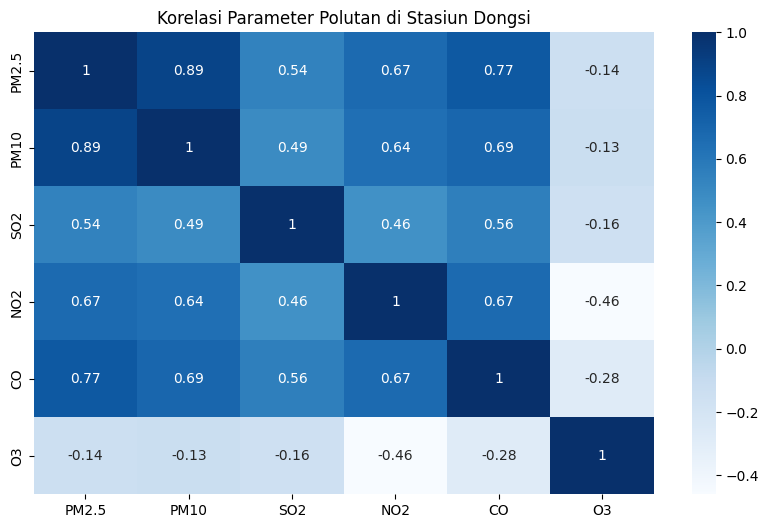

In [250]:
# Menggunakan korelasi untuk mengetahui hubungan Indikator Polutan Tabel Dongsi
plt.figure(figsize=(10,6))
sns.heatmap(dongsi_df[['PM2.5','PM10','SO2','NO2','CO','O3']].corr(numeric_only = True),cmap=plt.cm.Blues,annot=True)
plt.title("Korelasi Parameter Polutan di Stasiun Dongsi")
plt.show()

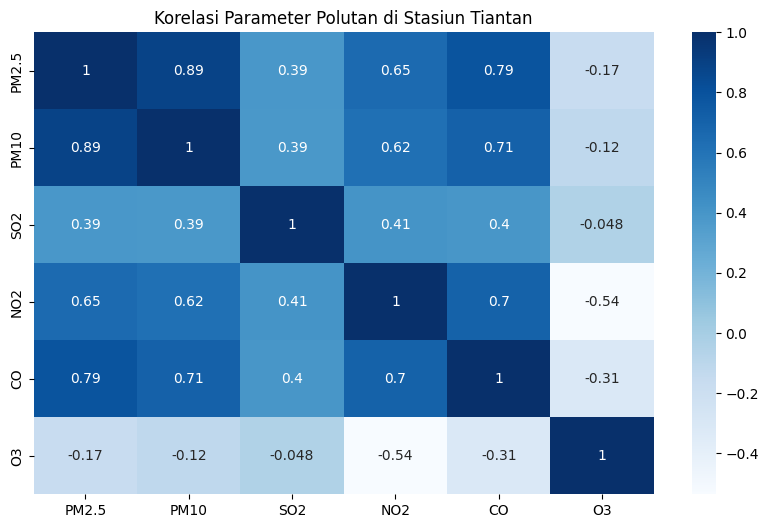

In [251]:
# Menggunakan korelasi untuk mengetahui hubungan Indikator Polutan Tabel Tiantan
plt.figure(figsize=(10,6))
sns.heatmap(tiantan_df[['PM2.5','PM10','SO2','NO2','CO','O3']].corr(numeric_only = True),cmap=plt.cm.Blues,annot=True)
plt.title("Korelasi Parameter Polutan di Stasiun Tiantan")
plt.show()

In [252]:
# Gabungkan DataFrame
combined_df = pd.concat([dongsi_df, tiantan_df], ignore_index=True)

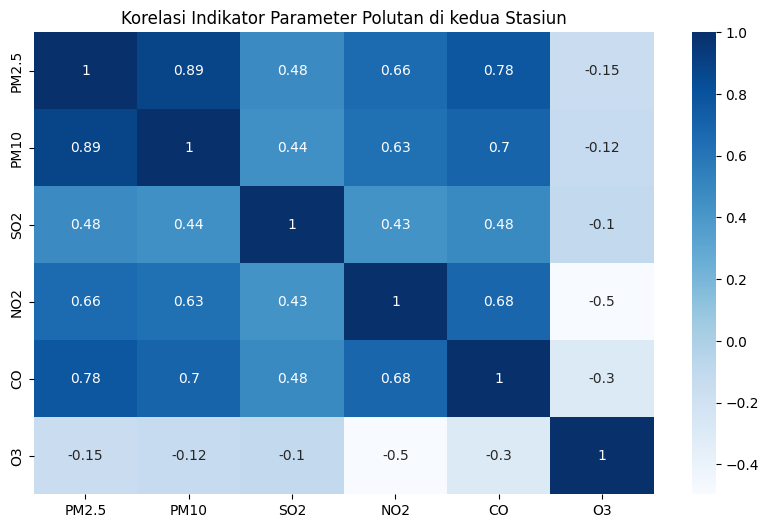

In [253]:
# Menggunakan korelasi untuk mengetahui hubungan Indikator Polutan di Kedua Stasiun
plt.figure(figsize=(10,6))
sns.heatmap(combined_df[['PM2.5','PM10','SO2','NO2','CO','O3']].corr(numeric_only = True),cmap=plt.cm.Blues,annot=True)
plt.title("Korelasi Indikator Parameter Polutan di kedua Stasiun")
plt.show()

**Insight:**
- Berdasarkan hasil korelasi antara indikator polutan, terdapat hubungan *positif* antara indikator PM2.5 , PM10, SO2, NO2, dan CO. Sedangkan indikator O3 bernilai *negatif* yang artinya memiliki hubungan yang lemah atau tidak kuat

### Pertanyaan 2: Bagaimana kualitas udara di kedua stasiun dari tahun ke tahun?

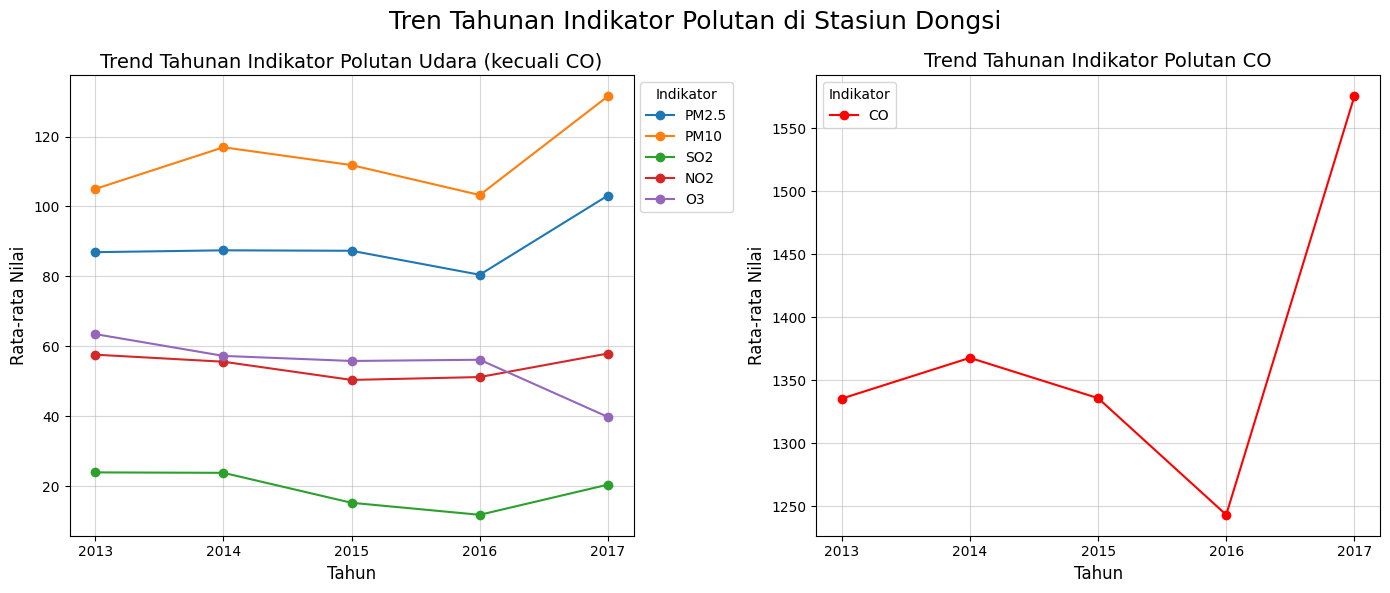

In [254]:
# Mengelompokkan data berdasarkan tahun dan menghitung mean
year_dongsi = dongsi_df.groupby("year").mean(numeric_only=True)

# Membuat subplots dengan 1 baris, 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Subplot pertama untuk indikator selain CO
for column in ["PM2.5", "PM10", "SO2", "NO2", "O3"]:
    axes[0].plot(year_dongsi.index, year_dongsi[column], marker="o", label=column)

# Menambahkan judul, label, dan legenda untuk subplot pertama
axes[0].set_title("Trend Tahunan Indikator Polutan Udara (kecuali CO)", fontsize=14)
axes[0].set_xlabel("Tahun", fontsize=12)
axes[0].set_ylabel("Rata-rata Nilai", fontsize=12)
axes[0].set_xticks(year_dongsi.index)
axes[0].legend(title="Indikator", fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')
axes[0].grid(alpha=0.5)

# Subplot kedua untuk indikator CO
axes[1].plot(year_dongsi.index, year_dongsi["CO"], marker="o", color="red", label="CO")

# Menambahkan judul, label, dan legenda untuk subplot kedua
axes[1].set_title("Trend Tahunan Indikator Polutan CO", fontsize=14)
axes[1].set_xlabel("Tahun", fontsize=12)
axes[1].set_ylabel("Rata-rata Nilai", fontsize=12)
axes[1].set_xticks(year_dongsi.index)
axes[1].legend(title="Indikator", fontsize=10, loc='upper left')
axes[1].grid(alpha=0.5)

# Menambahkan judul besar untuk keseluruhan figure
fig.suptitle("Tren Tahunan Indikator Polutan di Stasiun Dongsi", fontsize=18)

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


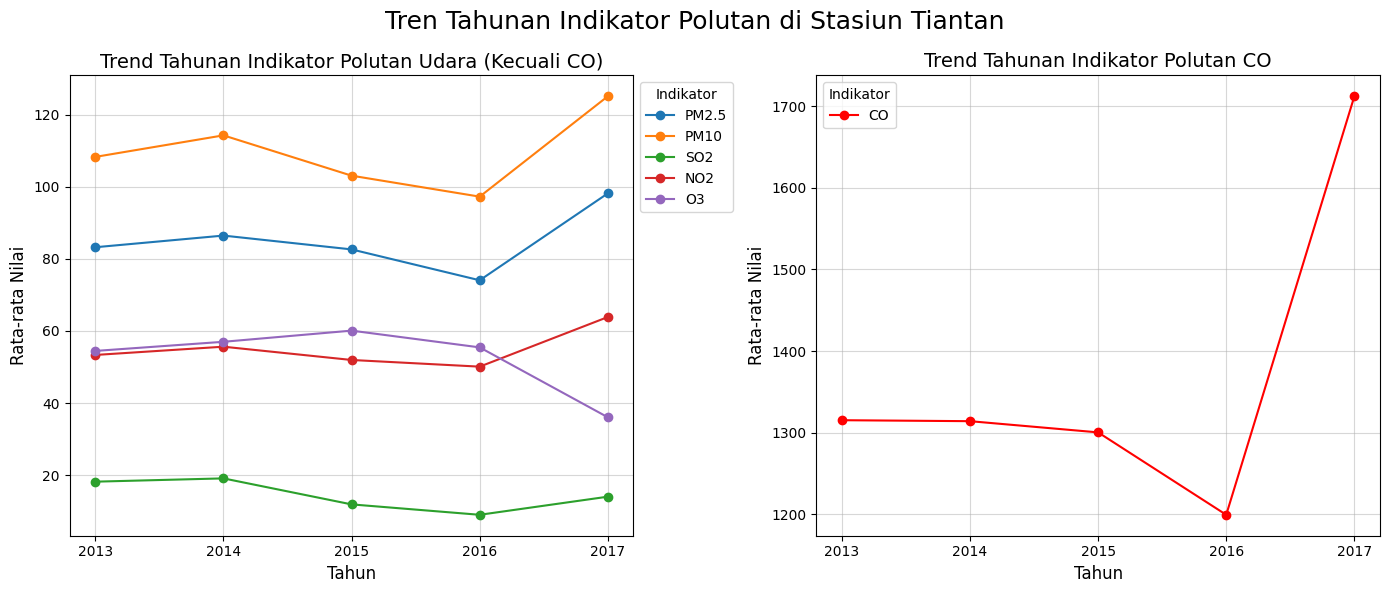

In [255]:
# Mengelompokkan data berdasarkan tahun dan menghitung mean
year_tiantan = tiantan_df.groupby("year").mean(numeric_only=True)

# Membuat subplots dengan 1 baris, 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Subplot pertama untuk indikator selain CO
for column in ["PM2.5", "PM10", "SO2", "NO2", "O3"]:
    axes[0].plot(year_tiantan.index, year_tiantan[column], marker="o", label=column)

# Menambahkan judul, label, dan legenda untuk subplot pertama
axes[0].set_title("Trend Tahunan Indikator Polutan Udara (Kecuali CO)", fontsize=14)
axes[0].set_xlabel("Tahun", fontsize=12)
axes[0].set_ylabel("Rata-rata Nilai", fontsize=12)
axes[0].set_xticks(year_tiantan.index)
axes[0].legend(title="Indikator", fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')
axes[0].grid(alpha=0.5)

# Subplot kedua untuk indikator CO
axes[1].plot(year_tiantan.index, year_tiantan["CO"], marker="o", color="red", label="CO")

# Menambahkan judul, label, dan legenda untuk subplot kedua
axes[1].set_title("Trend Tahunan Indikator Polutan CO", fontsize=14)
axes[1].set_xlabel("Tahun", fontsize=12)
axes[1].set_ylabel("Rata-rata Nilai", fontsize=12)
axes[1].set_xticks(year_tiantan.index)
axes[1].legend(title="Indikator", fontsize=10, loc='upper left')
axes[1].grid(alpha=0.5)

# Menambahkan judul besar untuk keseluruhan figure
fig.suptitle("Tren Tahunan Indikator Polutan di Stasiun Tiantan", fontsize=18)

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


In [256]:
# Melihat data rata-rata setiap indikator polutan setiap tahunnya di kedua stasiun
combined_df.groupby(["year","station"])[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean()

PM2.5        PM10        SO2        NO2           CO  \
year station                                                              
2013 Dongsi    86.925677  105.018181  23.917802  57.598677  1335.309054   
     Tiantan   83.197674  108.253061  18.183166  53.324052  1315.328159   
2014 Dongsi    87.455437  116.939148  23.790476  55.581038  1367.693745   
     Tiantan   86.432895  114.227854  19.095107  55.616395  1314.141073   
2015 Dongsi    87.326373  111.840267  15.218655  50.372651  1335.668408   
     Tiantan   82.600233  103.048874  11.883571  51.934587  1300.419395   
2016 Dongsi    80.465627  103.282445  11.783711  51.196463  1243.028490   
     Tiantan   74.035310   97.231152   8.996379  50.082983  1199.436714   
2017 Dongsi   103.130438  131.536102  20.405042  57.933206  1575.439534   
     Tiantan   98.140565  125.071017  14.021285  63.845819  1712.240113   

                     O3  
year station             
2013 Dongsi   63.489902  
     Tiantan  54.439977  
2014 Dongsi   57.245944  
     Tiantan  56.976402  
2015 Dongsi   55.796030  
     Tiantan  60.070521  
2016 Dongsi   56.145970  
     Tiantan  55.425442  
2017 Dongsi   39.780805  
     Tiantan  36.041271

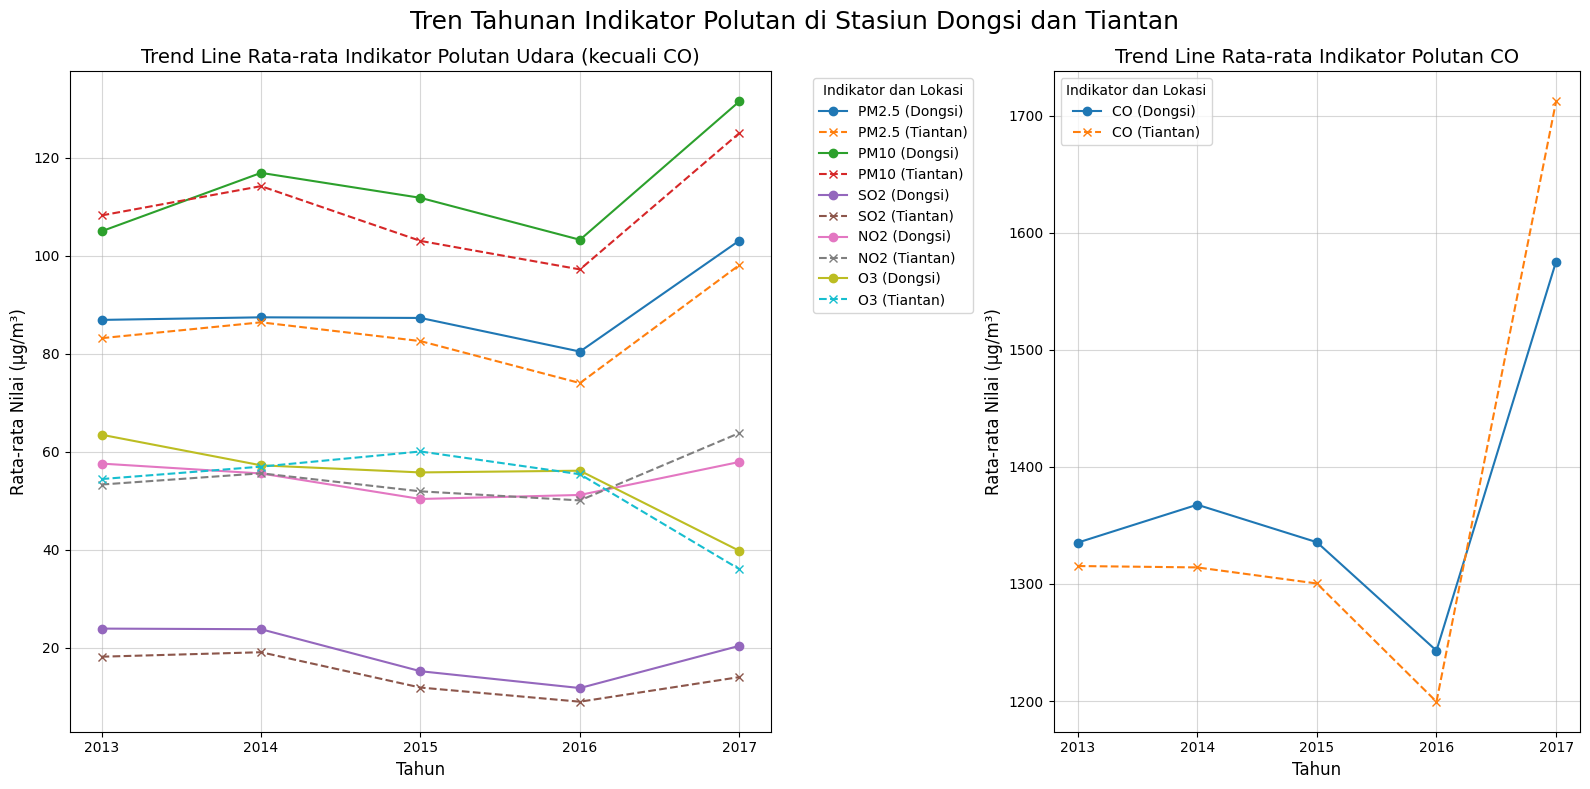

In [257]:
# Membuat subplots dengan ukuran plot pertama lebih besar dari plot kedua
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False, gridspec_kw={'width_ratios': [4, 3]})

# Subplot pertama untuk indikator selain CO
for column in ["PM2.5", "PM10", "SO2", "NO2", "O3"]:
    # Trend line Dongsi
    axes[0].plot(year_dongsi.index, year_dongsi[column], marker="o", label=f"{column} (Dongsi)", linestyle="-")
    # Trend line Tiantan
    axes[0].plot(year_tiantan.index, year_tiantan[column], marker="x", label=f"{column} (Tiantan)", linestyle="--")

# Menambahkan judul, label, dan legenda untuk subplot pertama
axes[0].set_title("Trend Line Rata-rata Indikator Polutan Udara (kecuali CO)", fontsize=14)
axes[0].set_xlabel("Tahun", fontsize=12)
axes[0].set_ylabel("Rata-rata Nilai (μg/m³)", fontsize=12)
axes[0].set_xticks(year_dongsi.index)
axes[0].legend(title="Indikator dan Lokasi", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(alpha=0.5)

# Subplot kedua untuk indikator CO
axes[1].plot(year_dongsi.index, year_dongsi["CO"], marker="o", label="CO (Dongsi)", linestyle="-")
axes[1].plot(year_tiantan.index, year_tiantan["CO"], marker="x", label="CO (Tiantan)", linestyle="--")

# Menambahkan judul, label, dan legenda untuk subplot kedua
axes[1].set_title("Trend Line Rata-rata Indikator Polutan CO", fontsize=14)
axes[1].set_xlabel("Tahun", fontsize=12)
axes[1].set_ylabel("Rata-rata Nilai (μg/m³)", fontsize=12)
axes[1].set_xticks(year_dongsi.index)
axes[1].legend(title="Indikator dan Lokasi", fontsize=10)
axes[1].grid(alpha=0.5)

# Menambahkan judul besar untuk keseluruhan figure
fig.suptitle("Tren Tahunan Indikator Polutan di Stasiun Dongsi dan Tiantan", fontsize=18)

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


**Insight**

- Tren rata-rata indikator polutan pada kedua stasiun mengalami naik turun setiap tahunnya, dimana (PM2.5 , PM10, SO2, NO2, dan CO) atau **5 dari 6 indikator polutan mengalami kenaikan yang signifikan ditahun akhir (tahun 2017) dan memiliki nilai terendah pada tahun 2016**.
- Untuk kualitas udara dari kedua stasiun, **rata-rata dari setiap indikator stasiun Tiantan lebih rendah daripada stasiun Dongsi**. Untuk indikator parameter **CO memiliki nilai tertinggi di stasiun Tiantan pada tahun 2017** hingga mencapai angka 1700-an.

### Pertanyaan 3: Daerah mana yang memiliki kualitas udara terbaik?

In [258]:
# Melihat data distribusi kategori per indikator parameter polutan
categories = ['Kategori_PM2.5', 'Kategori_PM10', 'Kategori_SO2', 'Kategori_NO2', 'Kategori_CO','Kategori_O3']

for category in categories:
    print(f"\nDistribusi untuk {category}:")
    print(combined_df.groupby("station")[category].value_counts())


Distribusi untuk Kategori_PM2.5:
station  Kategori_PM2.5    
Dongsi   Tidak Sehat           12978
         Sedang                 9849
         Baik                   6297
         Sangat Tidak Sehat     4016
         Berbahaya              1924
Tiantan  Tidak Sehat           13026
         Sedang                10339
         Baik                   6238
         Sangat Tidak Sehat     3884
         Berbahaya              1577
Name: count, dtype: int64

Distribusi untuk Kategori_PM10:
station  Kategori_PM10     
Dongsi   Sedang                15266
         Baik                  11127
         Tidak Sehat            7690
         Berbahaya               503
         Sangat Tidak Sehat      478
Tiantan  Sedang                16543
         Baik                  10591
         Tidak Sehat            7174
         Sangat Tidak Sehat      396
         Berbahaya               360
Name: count, dtype: int64

Distribusi untuk Kategori_SO2:
station  Kategori_SO2
Dongsi   Baik            32259


In [259]:
# Menghitung rata-rata polutan untuk setiap stasiun
mean_values = combined_df.groupby("station")[["PM2.5", "PM10", "CO", "NO2", "SO2", "O3"]].mean()
print(mean_values)

             PM2.5        PM10           CO        NO2        SO2         O3
station                                                                     
Dongsi   86.194205  110.336793  1330.069210  53.699012  18.531086  57.210625
Tiantan  82.164816  106.363610  1298.303211  53.162589  14.367691  55.984193


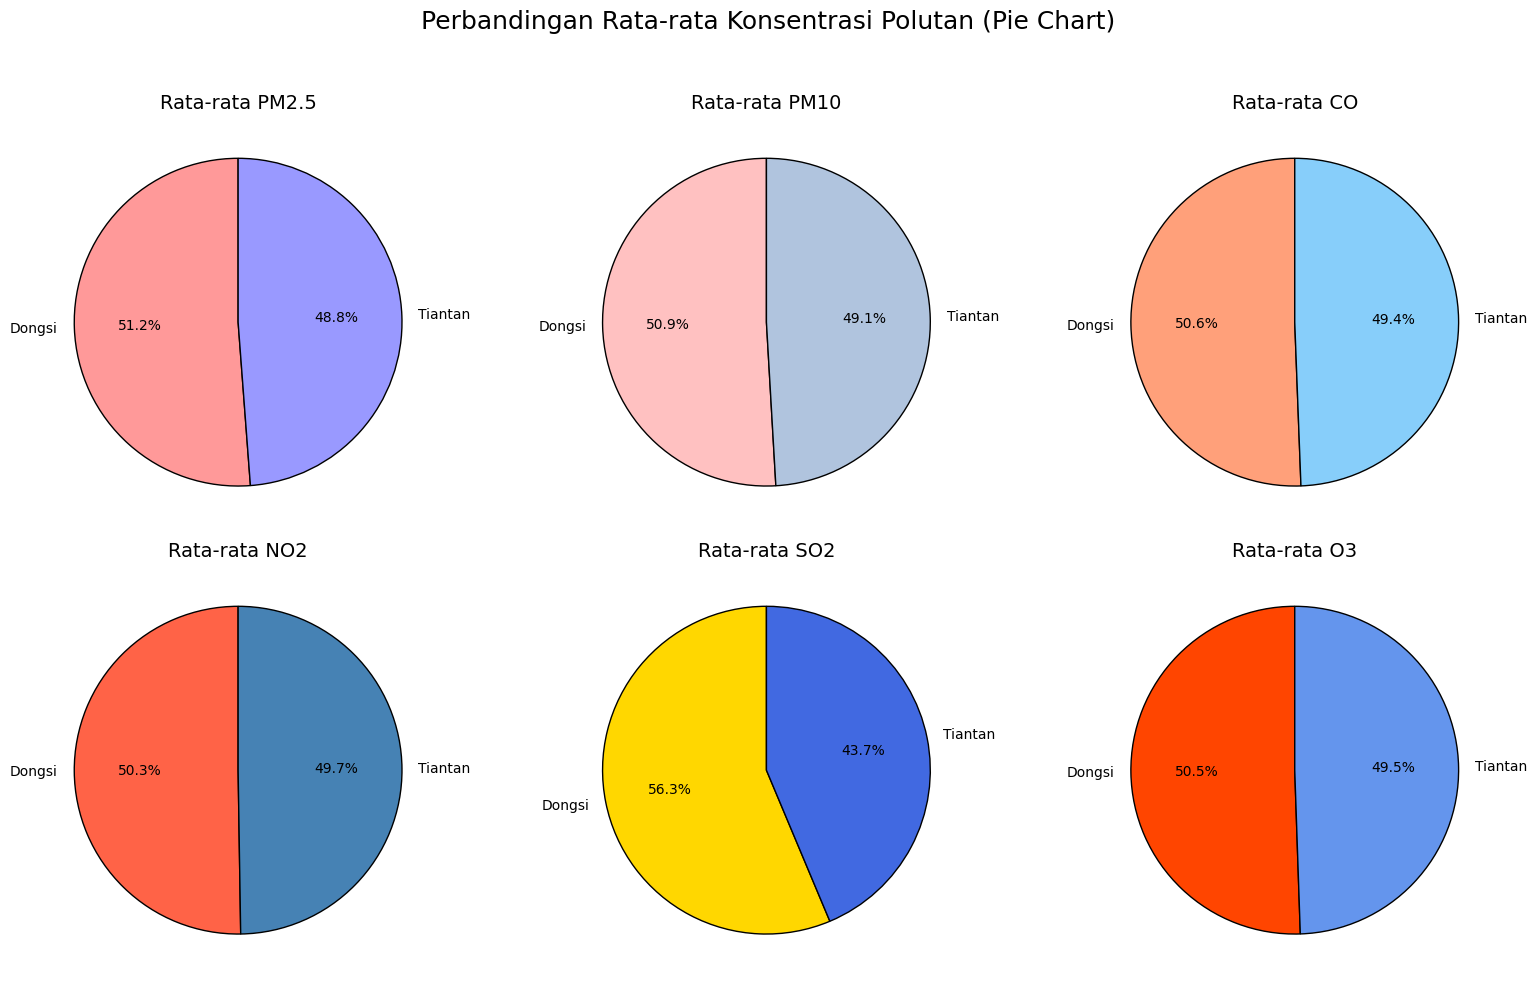

In [260]:
# Membuat figure untuk 6 diagram pie
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()  # Mempermudah iterasi dengan axes dalam bentuk array

# Daftar warna untuk pie chart
colors = [["#FF9999", "#9999FF"], ["#FFC1C1", "#B0C4DE"], ["#FFA07A", "#87CEFA"],
          ["#FF6347", "#4682B4"], ["#FFD700", "#4169E1"], ["#FF4500", "#6495ED"]]

# Membuat diagram pie untuk masing-masing polutan
for i, polutan in enumerate(mean_values.columns):
    ax = axes[i]
    ax.pie(
        mean_values[polutan],  # Data untuk pie chart
        labels=mean_values.index,  # Label berdasarkan stasiun
        autopct="%1.1f%%",  # Format persentase
        startangle=90,  # Rotasi awal
        colors=colors[i],  # Warna untuk setiap pie
        wedgeprops={"edgecolor": "black"}  # Garis tepi pie
    )
    ax.set_title(f"Rata-rata {polutan}", fontsize=14)

# Menambahkan judul besar untuk keseluruhan figure
fig.suptitle("Perbandingan Rata-rata Konsentrasi Polutan (Pie Chart)", fontsize=18)

# Menyesuaikan tata letak
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Memberi ruang untuk judul besar
plt.show()


**Insight:**
- Dari hasil persentase setiap indikator polutan dapat dilihat bahwa kualitas udara di Stasiun Dongsi memiliki jumlah polutan yang lebih banyak dibanding dengan Stasiun Tiantan, Dimana stasiun Dongsi memiliki persentase diatas 50% disemua indikator polutannya. Oleh karena itu **Stasiun Tiantan Memiliki Kualitas Udara yang Lebih Baik** dibandingkan Stasiun Dongsi. Karena semakin sedikit polutan semakin baik kualitas udaranya.

## Analisis Lanjutan (Opsional)

In [ ]:
# # untuk menimport dataset yang sudah bersih
# from google.colab import files

# # Simpan DataFrame sebagai file CSV
# nama_file = "dataset_project.csv"
# combined_df.to_csv(nama_file, index=False)

# # Unduh file CSV ke komputer
# files.download(nama_file)

## Conclusion

- **Pertanyaan 1** : Berdasarkan hasil korelasi antara indikator polutan, terdapat hubungan positif antara indikator PM2.5 , PM10, SO2, NO2, dan CO. Sedangkan indikator O3 bernilai negatif yang artinya memiliki hubungan yang lemah atau tidak kuat
- **Pertanyaan 2** : Indikator PM2.5 , PM10, SO2, NO2, dan CO (5 dari 6 indikator polutan) mengalami kenaikan yang signifikan ditahun akhir (tahun 2017) dan memiliki nilai terendah pada tahun 2016. Rata-rata dari setiap indikator stasiun Tiantan lebih rendah daripada stasiun Dongsi. Untuk indikator parameter CO memiliki nilai tertinggi di stasiun Tiantan pada tahun 2017 hingga mencapai angka 1700-an.

- **Pertanyaan 3** : Stasiun Tiantan Memiliki Kualitas Udara yang Lebih Baik dibandingkan Stasiun Dongsi karena kualitas udara di Stasiun Dongsi memiliki jumlah polutan yang lebih banyak (persentase diatas 50% disemua indikator polutannya) dibanding dengan Stasiun Tiantan.